# Лабораторная работа №3: "Обработка признаков (часть 2)"
ИУ5-23М  Аимань Мухэяти
Задание:
Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных.

Для выполнения следующих пунктов можно использовать несколько различных наборов данных

Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:

   ·масштабирование признаков (не менее чем тремя способами);
   ·обработку выбросов для числовых признаков (по одному способу для удаления
   ·выбросов и для замены выбросов);
   ·обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
   ·отбор признаков: один метод из группы методов фильтрации (filter methods); один метод из группы методов обертывания (wrapper methods); ** один метод из группы методов вложений (embedded methods).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import warnings
warnings.simplefilter("ignore", UserWarning)

In [6]:
dataset = pd.read_csv('phonetrain.csv')

In [25]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [26]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [27]:
X=dataset.drop('price_range',axis=1)

In [28]:
y=dataset['price_range']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [30]:
# Function for restoring the dataframe
# based on scaled data

def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X.columns)
    return res

In [31]:
# Converting arrays to DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((1340, 20), (660, 20))

 Масштабирование данных на основе Z-оценки

In [32]:
# Train the StandardScaler on the entire sample and scale it
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X)
# forming a DataFrame based on an array
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


In [33]:
data_cs11_scaled.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.128298e-16,-1.927347e-16,-2.172151e-16,3.990142e-16,9.230117e-17,-2.048361e-16,-8.754109e-17,-1.045830e-16,1.804112e-16,-4.690692e-17,1.669775e-16,1.287304e-16,5.595524e-17,-1.582068e-16,3.719247e-17,-4.085621e-17,1.052491e-16,2.184919e-16,3.065326e-16,4.278800e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01


In [36]:
# Plotting the distribution density
def draw_ba(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
# first graph
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
# second graph
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

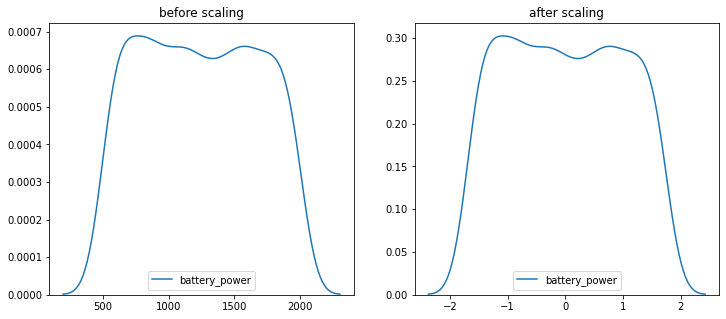

In [92]:
draw_ba('battery_power', dataset, data_cs11_scaled, 'before scaling', 'after scaling')

In [56]:
# Training the StandardScaler on the training sample
# and scale the training and test samples
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# forming a DataFrame based on an array
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [57]:
data_cs12_scaled_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03
mean,2.398579e-17,-2.656250e-16,-7.854414e-17,-1.347181e-16,-2.485574e-18,-1.413463e-16,6.795973e-17,-2.289214e-16,-2.197247e-16,-1.710075e-16,-7.754991e-17,2.435862e-17,9.296047e-17,-1.075425e-16,-1.984317e-17,-4.706020e-17,4.639738e-18,3.580884e-16,4.572628e-16,1.537742e-16
std,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00
min,-1.687724e+00,-9.822471e-01,-1.250218e+00,-1.005988e+00,-1.001647e+00,-1.058420e+00,-1.680111e+00,-1.419362e+00,-1.697059e+00,-1.531661e+00,-1.650783e+00,-1.444392e+00,-1.756813e+00,-1.692960e+00,-1.732334e+00,-1.333429e+00,-1.680705e+00,-1.749459e+00,-1.016555e+00,-1.012012e+00
25%,-8.904450e-01,-9.822471e-01,-1.002540e+00,-1.005988e+00,-7.713831e-01,-1.058420e+00,-9.042805e-01,-1.073050e+00,-8.799135e-01,-6.575445e-01,-8.266214e-01,-8.106914e-01,-8.664025e-01,-8.435369e-01,-7.859158e-01,-8.765065e-01,-9.347764e-01,5.716053e-01,-1.016555e+00,-1.012012e+00
50%,1.072825e-02,-9.822471e-01,-1.182938e-02,9.940476e-01,-3.108559e-01,9.448044e-01,-1.761746e-02,-3.411432e-02,2.176390e-02,-2.204861e-01,-2.460183e-03,-1.814577e-01,-1.783875e-02,-1.880064e-02,1.605027e-01,-1.911231e-01,-2.365818e-03,5.716053e-01,9.837147e-01,9.881301e-01
75%,8.560016e-01,1.018074e+00,8.550425e-01,9.940476e-01,6.101985e-01,9.448044e-01,8.690455e-01,1.004822e+00,8.459534e-01,6.536305e-01,8.217011e-01,6.822730e-01,8.731532e-01,9.161138e-01,8.703166e-01,7.227215e-01,9.300448e-01,5.716053e-01,9.837147e-01,9.881301e-01
max,1.693370e+00,1.018074e+00,1.845753e+00,9.940476e-01,3.373362e+00,9.448044e-01,1.755709e+00,1.697446e+00,1.684232e+00,1.527747e+00,1.645862e+00,2.932886e+00,1.718811e+00,1.721192e+00,1.580130e+00,2.778872e+00,1.675973e+00,5.716053e-01,9.837147e-01,9.881301e-01


In [58]:
data_cs12_scaled_test.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,-0.066604,0.023975,0.047651,0.039485,-0.028260,-0.041632,-0.045578,-0.085012,0.001826,0.021220,-0.049163,-0.011117,-0.036335,0.029511,-0.010856,-0.048162,-0.000953,0.054641,-0.031574,0.006242
std,0.975427,1.000901,1.030872,0.999742,0.998750,1.002257,1.016119,0.993973,0.992307,0.999600,0.997958,0.972703,1.014027,0.974662,0.990445,0.984785,1.056376,0.966473,1.000778,1.000664
min,-1.685465,-0.982247,-1.250218,-1.005988,-1.001647,-1.058420,-1.680111,-1.419362,-1.697059,-1.531661,-1.650783,-1.442158,-1.759138,-1.698446,-1.732334,-1.333429,-1.680705,-1.749459,-1.016555,-1.012012
25%,-0.918677,-0.982247,-1.002540,-1.005988,-0.771383,-1.058420,-0.959697,-1.073050,-0.851736,-0.657544,-0.991454,-0.816833,-0.907087,-0.810163,-0.785916,-0.876506,-0.934776,0.571605,-1.016555,-1.012012
50%,-0.142855,1.018074,0.112009,0.994048,-0.310856,0.944804,-0.100742,-0.034114,-0.006414,-0.220486,-0.002460,-0.185924,-0.043412,0.103721,-0.076102,-0.191123,-0.002366,0.571605,-1.016555,0.988130
75%,0.749284,1.018074,0.978881,0.994048,0.610199,0.944804,0.827483,0.658510,0.838909,1.090689,0.821701,0.648215,0.877222,0.789477,0.870317,0.494260,0.930045,0.571605,0.983715,0.988130
max,1.688853,1.018074,1.845753,0.994048,3.143098,0.944804,1.755709,1.697446,1.684232,1.527747,1.645862,2.908320,1.723461,1.723020,1.580130,2.778872,1.675973,0.571605,0.983715,0.988130


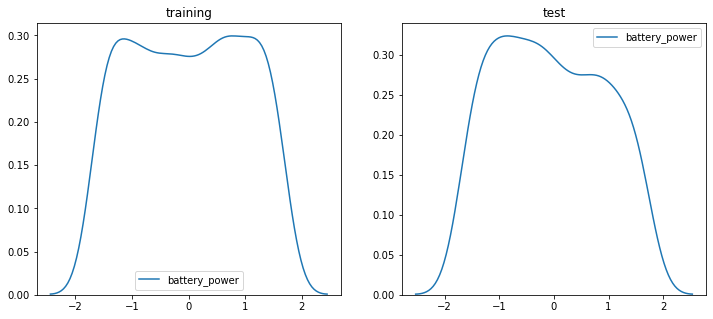

In [71]:
draw_ba('battery_power', data_cs12_scaled_train,data_cs12_scaled_test, 'training', 'test')


Масштабирование "Mean Normalisation"

In [60]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [62]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X)
data_cs21_scaled.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.006501,0.003955,0.005079,0.006515,-0.002132,-0.006858,-0.004378,-0.009001,0.000178,0.002289,-0.004921,-0.000838,-0.003450,0.002852,-0.001082,-0.003865,-0.000094,0.007769,-0.005209,0.001030
std,0.293533,0.500100,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,0.303216,0.226419,0.289097,0.290501,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076
min,-0.499165,-0.491045,-0.403821,-0.502985,-0.228947,-0.528358,-0.488999,-0.455390,-0.501897,-0.500640,-0.500746,-0.329975,-0.506136,-0.497472,-0.522974,-0.324254,-0.500705,-0.753731,-0.508209,-0.505970
25%,-0.264863,-0.491045,-0.323821,-0.502985,-0.176316,-0.528358,-0.263192,-0.344279,-0.260230,-0.214925,-0.250746,-0.185715,-0.255467,-0.242652,-0.237260,-0.213143,-0.278483,0.246269,-0.508209,-0.505970
50%,-0.014863,-0.491045,-0.003821,0.497015,-0.071053,0.471642,-0.005128,-0.010945,0.006437,-0.072068,-0.000746,-0.042220,-0.006470,0.008821,-0.022974,-0.046476,-0.000705,0.246269,0.491791,0.494030
75%,0.245157,0.508955,0.276179,0.497015,0.139474,0.471642,0.252937,0.322388,0.248103,0.356503,0.249254,0.153316,0.251724,0.254670,0.262740,0.175746,0.277073,0.246269,0.491791,0.494030
max,0.500835,0.508955,0.596179,0.497015,0.771053,0.471642,0.511001,0.544610,0.498103,0.499360,0.499254,0.670025,0.495871,0.504670,0.477026,0.675746,0.499295,0.246269,0.491791,0.494030


In [63]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [64]:
data_cs22_scaled_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03
mean,-3.894066e-18,1.617280e-16,7.224217e-16,1.062169e-16,2.961976e-17,1.149992e-16,1.937194e-17,-1.666888e-15,-6.421066e-17,-8.156825e-17,-1.393993e-17,2.402721e-18,2.858410e-17,-3.769787e-17,2.532178e-18,-5.343984e-18,-2.734131e-18,-3.272672e-17,-3.645508e-18,3.388666e-16
std,2.958727e-01,5.001064e-01,3.231210e-01,5.001778e-01,2.286563e-01,4.993815e-01,2.911601e-01,3.209608e-01,2.958555e-01,3.269826e-01,3.034520e-01,2.285378e-01,2.878255e-01,2.930079e-01,3.020027e-01,2.432637e-01,2.980248e-01,4.309977e-01,5.001193e-01,5.001510e-01
min,-4.991650e-01,-4.910448e-01,-4.038209e-01,-5.029851e-01,-2.289474e-01,-5.283582e-01,-4.889986e-01,-4.553897e-01,-5.018968e-01,-5.006397e-01,-5.007463e-01,-3.299749e-01,-5.054670e-01,-4.958655e-01,-5.229744e-01,-3.242537e-01,-5.007048e-01,-7.537313e-01,-5.082090e-01,-5.059701e-01
25%,-2.633601e-01,-4.910448e-01,-3.238209e-01,-5.029851e-01,-1.763158e-01,-5.283582e-01,-2.631921e-01,-3.442786e-01,-2.602301e-01,-2.149254e-01,-2.507463e-01,-1.852045e-01,-2.492797e-01,-2.470707e-01,-2.372601e-01,-2.131426e-01,-2.784826e-01,2.462687e-01,-5.082090e-01,-5.059701e-01
50%,3.173013e-03,-4.910448e-01,-3.820896e-03,4.970149e-01,-7.105263e-02,4.716418e-01,-5.127588e-03,-1.094527e-02,6.436567e-03,-7.206823e-02,-7.462687e-04,-4.145446e-02,-5.132531e-03,-5.506679e-03,4.845416e-02,-4.647595e-02,-7.048093e-04,2.462687e-01,4.917910e-01,4.940299e-01
75%,2.531730e-01,5.089552e-01,2.761791e-01,4.970149e-01,1.394737e-01,4.716418e-01,2.529369e-01,3.223881e-01,2.501866e-01,2.136461e-01,2.492537e-01,1.558670e-01,2.512220e-01,2.683284e-01,2.627399e-01,1.757463e-01,2.770730e-01,2.462687e-01,4.917910e-01,4.940299e-01
max,5.008350e-01,5.089552e-01,5.961791e-01,4.970149e-01,7.710526e-01,4.716418e-01,5.110014e-01,5.446103e-01,4.981032e-01,4.993603e-01,4.992537e-01,6.700251e-01,4.945330e-01,5.041345e-01,4.770256e-01,6.757463e-01,4.992952e-01,2.462687e-01,4.917910e-01,4.940299e-01


In [65]:
data_cs22_scaled_test.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,-0.019699,0.011986,0.015391,0.019742,-0.006459,-0.020782,-0.013265,-0.027275,0.000540,0.006936,-0.014913,-0.002540,-0.010454,0.008644,-0.003277,-0.011712,-0.000284,0.023541,-0.015785,0.003121
std,0.288495,0.500370,0.332972,0.499862,0.228285,0.500322,0.295743,0.318907,0.293470,0.326730,0.302719,0.222216,0.291754,0.285477,0.299005,0.239473,0.314709,0.416392,0.500322,0.500297
min,-0.498497,-0.491045,-0.403821,-0.502985,-0.228947,-0.528358,-0.488999,-0.455390,-0.501897,-0.500640,-0.500746,-0.329465,-0.506136,-0.497472,-0.522974,-0.324254,-0.500705,-0.753731,-0.508209,-0.505970
25%,-0.271710,-0.491045,-0.323821,-0.502985,-0.176316,-0.528358,-0.279321,-0.344279,-0.251897,-0.214925,-0.300746,-0.186608,-0.260985,-0.237296,-0.237260,-0.213143,-0.278483,0.246269,-0.508209,-0.505970
50%,-0.042251,0.508955,0.036179,0.497015,-0.071053,0.471642,-0.029321,-0.010945,-0.001897,-0.072068,-0.000746,-0.042475,-0.012490,0.030380,-0.022974,-0.046476,-0.000705,0.246269,-0.508209,0.494030
75%,0.221610,0.508955,0.316179,0.497015,0.139474,0.471642,0.240840,0.211277,0.248103,0.356503,0.249254,0.148086,0.252393,0.231237,0.262740,0.120191,0.277073,0.246269,0.491791,0.494030
max,0.499499,0.508955,0.596179,0.497015,0.718421,0.471642,0.511001,0.544610,0.498103,0.499360,0.499254,0.664413,0.495871,0.504670,0.477026,0.675746,0.499295,0.246269,0.491791,0.494030


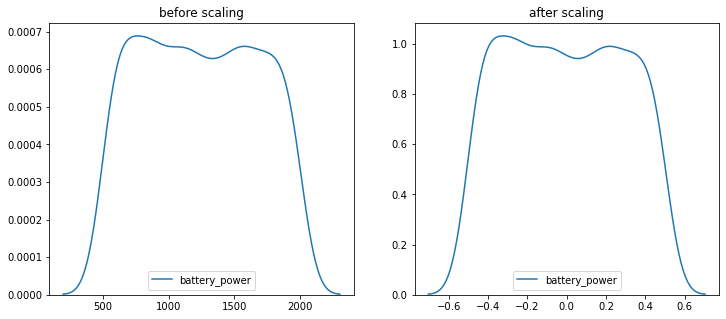

In [93]:
draw_ba('battery_power', dataset, data_cs21_scaled, 'before scaling', 'after scaling')

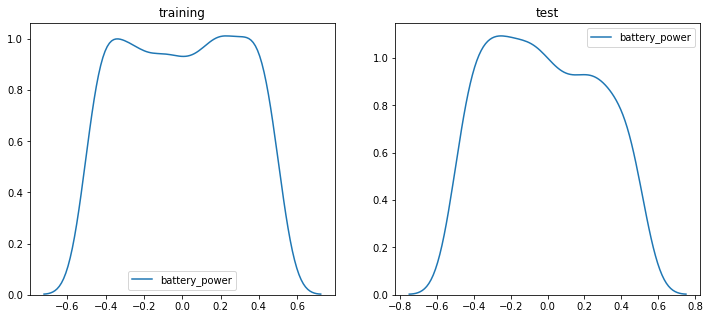

In [72]:
draw_ba('battery_power',data_cs22_scaled_train,data_cs22_scaled_test, 'training', 'test')

MinMax-масштабирование

In [73]:
# Train the StandardScaler on the entire sample and scale it
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X)
# forming a DataFrame based on an array
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,0.495825,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,0.303216,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,0.250000,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,0.500000,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,0.750000,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
cs32 =  MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# forming a DataFrame based on an array
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

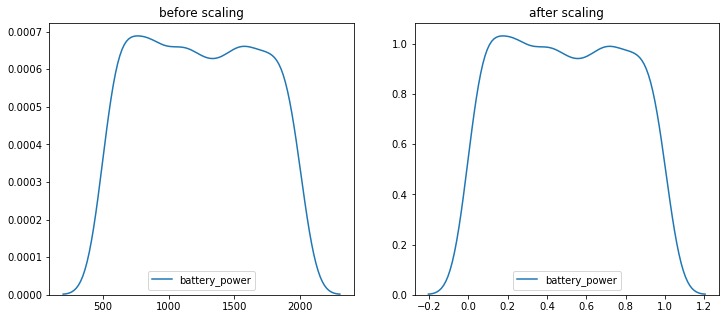

In [91]:
draw_ba('battery_power', dataset, data_cs31_scaled, 'before scaling', 'after scaling')

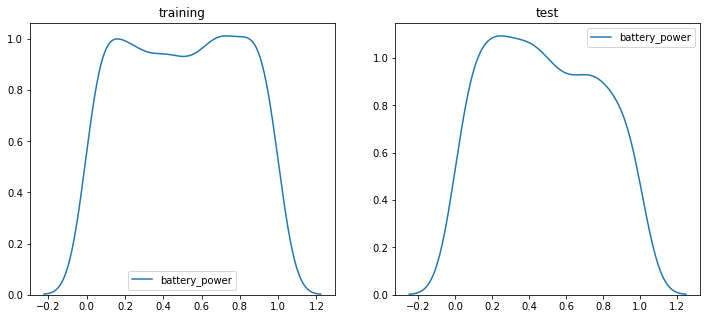

In [85]:
draw_ba('battery_power',data_cs32_scaled_train, data_cs32_scaled_test,'training','test')

Обработка выбросов

Удаление выбросов

In [163]:
dataset2=pd.read_csv('deputies_dataset.csv')

In [144]:
dataset2.head()

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value
0,0,2013-03-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,3.530749e+12,Fuels and lubricants.,AUTO POSTO 314 NORTE LTDA,70
1,0,2013-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,104
2,0,2013-02-17 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100
3,0,2013-03-15 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100
4,0,2013-01-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,77


In [145]:
dataset2.describe()

,bugged_date,deputy_id,receipt_social_security_number,receipt_value
count,3.014902e+06,3.014902e+06,2.493950e+06,3.014902e+06
mean,1.642873e-02,1.869101e+03,1.372664e+13,5.791575e+02
std,1.271174e-01,7.014751e+02,2.057245e+13,1.925418e+03
min,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.467000e+03,2.087236e+12,5.000000e+01
50%,0.000000e+00,1.882000e+03,7.423935e+12,1.420000e+02
75%,0.000000e+00,2.340000e+03,1.123836e+13,4.720000e+02
max,1.000000e+00,3.173000e+03,9.874986e+13,2.150000e+05


In [146]:
dataset2.shape

(3014902, 10)

In [147]:
x_listx  = ['receipt_value']

In [148]:
# Drawing function-Box diagram
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,7))
    # Box diagram
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # Box diagram
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [149]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1

In [150]:
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

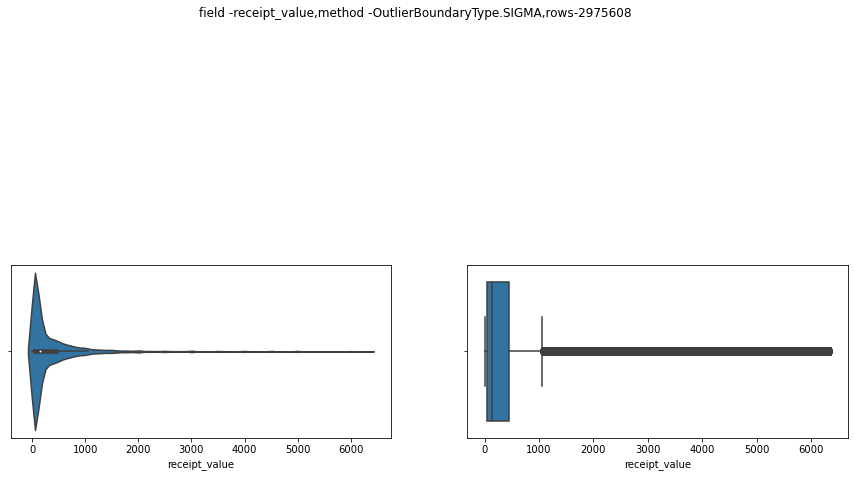

In [151]:
for col in x_listx:    
    for obt in OutlierBoundaryType:
        # Calculating the upper and lower bounds
        lower_boundary, upper_boundary = get_outlier_boundaries(dataset2, col, obt)
        # Flags for removing outliers
        outliers_temp = np.where(dataset2[col] > upper_boundary, True, 
                                 np.where(dataset2[col] < lower_boundary, True, False))
        # Deleting data based on the flag
        dataset2_trimmed = dataset2.loc[~(outliers_temp), ]  
        title = 'field -{},method -{},rows-{}'.format(col, obt, dataset2_trimmed.shape[0])
        diagnostic_plots(dataset2_trimmed, col, title)

Замена выбросов

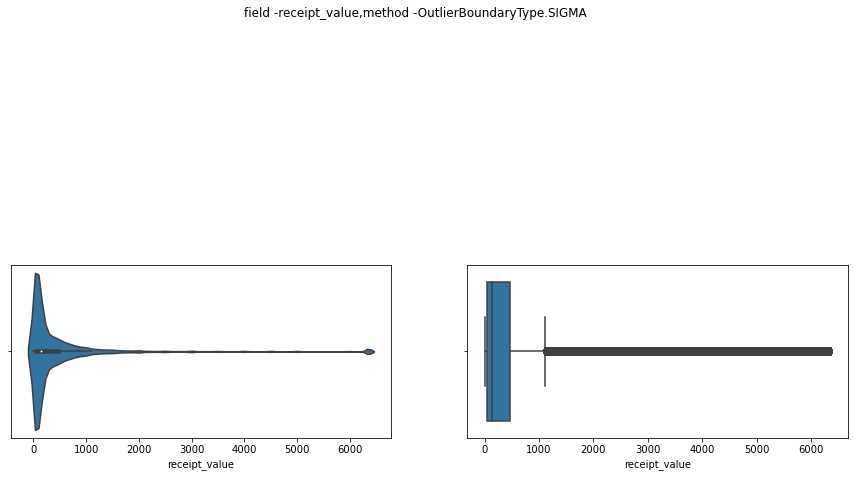

In [152]:
for col in x_listx:    
    for obt in OutlierBoundaryType:
        # Calculating the upper and lower bounds
        lower_boundary, upper_boundary = get_outlier_boundaries(dataset2, col, obt)
        # Data change
        dataset2[col] = np.where(dataset2[col] > upper_boundary, upper_boundary, 
                                 np.where(dataset2[col] < lower_boundary, lower_boundary, dataset2[col]))
        title = 'field -{},method -{}'.format(col, obt)
        diagnostic_plots(dataset2, col, title)


Обработка нестандартного признака

In [164]:
# Convert the date and time to the desired format
dataset2['dt'] = dataset2.apply(lambda x: pd.to_datetime(x['receipt_date'], format='%Y-%m-%d'), axis=1)

In [165]:
dataset2.head()

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,dt
0,0,2013-03-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,3.530749e+12,Fuels and lubricants.,AUTO POSTO 314 NORTE LTDA,70,2013-03-27
1,0,2013-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,104,2013-07-24
2,0,2013-02-17 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,2013-02-17
3,0,2013-03-15 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,2013-03-15
4,0,2013-01-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,77,2013-01-27


In [166]:
dataset2.dtypes

bugged_date                                int64
receipt_date                              object
deputy_id                                  int64
political_party                           object
state_code                                object
deputy_name                               object
receipt_social_security_number           float64
receipt_description                       object
establishment_name                        object
receipt_value                              int64
dt                                datetime64[ns]
dtype: object

In [167]:
# year
dataset2['year'] = dataset2['dt'].dt.year
# month
dataset2['month'] = dataset2['dt'].dt.month
# day
dataset2['day'] = dataset2['dt'].dt.day
#week
dataset2['week'] = dataset2['dt'].dt.isocalendar().week
#day of week
dataset2['dayofweek'] = dataset2['dt'].dt.dayofweek
#day_name
dataset2['day_name'] = dataset2['dt'].dt.day_name()
dataset2['is_holiday'] = dataset2.apply(lambda x: 1 if x['dt'].dayofweek in [5,6] else 0, axis=1)

In [168]:
dataset2.head()

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,dt,year,month,day,week,dayofweek,day_name,is_holiday
0,0,2013-03-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,3.530749e+12,Fuels and lubricants.,AUTO POSTO 314 NORTE LTDA,70,2013-03-27,2013,3,27,13,2,Wednesday,0
1,0,2013-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,104,2013-07-24,2013,7,24,30,2,Wednesday,0
2,0,2013-02-17 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,2013-02-17,2013,2,17,7,6,Sunday,1
3,0,2013-03-15 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,2013-03-15,2013,3,15,11,4,Friday,0
4,0,2013-01-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,77,2013-01-27,2013,1,27,4,6,Sunday,1


In [169]:
# Difference between dates
dataset2['now'] = datetime.datetime.today()
dataset2['diff'] = dataset2['now'] - dataset2['dt']
dataset2.dtypes

bugged_date                                 int64
receipt_date                               object
deputy_id                                   int64
political_party                            object
state_code                                 object
deputy_name                                object
receipt_social_security_number            float64
receipt_description                        object
establishment_name                         object
receipt_value                               int64
dt                                 datetime64[ns]
year                                        int64
month                                       int64
day                                         int64
week                                       UInt32
dayofweek                                   int64
day_name                                   object
is_holiday                                  int64
now                                datetime64[ns]
diff                              timedelta64[ns]


In [170]:
dataset2.head()

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,dt,year,month,day,week,dayofweek,day_name,is_holiday,now,diff
0,0,2013-03-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,3.530749e+12,Fuels and lubricants.,AUTO POSTO 314 NORTE LTDA,70,2013-03-27,2013,3,27,13,2,Wednesday,0,2021-04-24 02:31:53.272103,2950 days 02:31:53.272103
1,0,2013-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,104,2013-07-24,2013,7,24,30,2,Wednesday,0,2021-04-24 02:31:53.272103,2831 days 02:31:53.272103
2,0,2013-02-17 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,2013-02-17,2013,2,17,7,6,Sunday,1,2021-04-24 02:31:53.272103,2988 days 02:31:53.272103
3,0,2013-03-15 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,2013-03-15,2013,3,15,11,4,Friday,0,2021-04-24 02:31:53.272103,2962 days 02:31:53.272103
4,0,2013-01-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,77,2013-01-27,2013,1,27,4,6,Sunday,1,2021-04-24 02:31:53.272103,3009 days 02:31:53.272103


Отбор признаков из группы методов фильтрации (корреляция признаков)

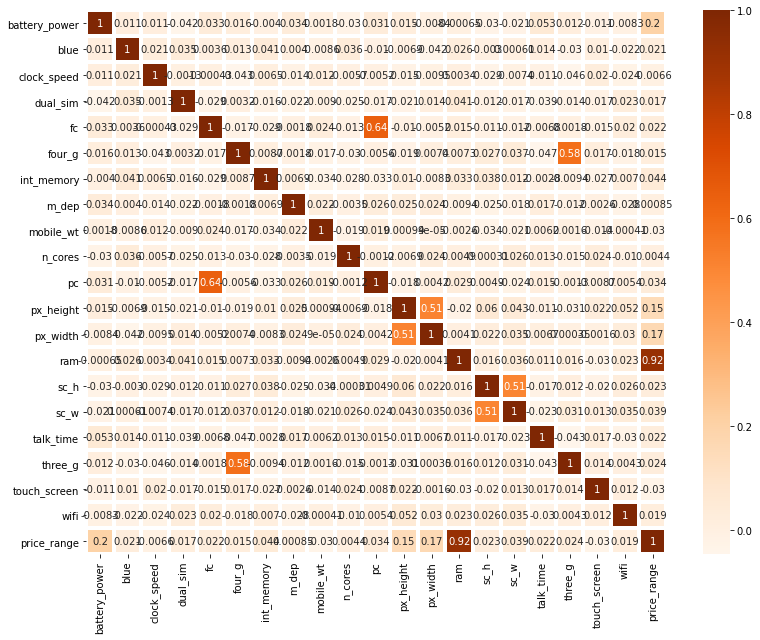

In [174]:
plt.figure(figsize=(13,10))
sns.heatmap(dataset.corr(), cmap="Oranges", annot=True, linewidths=3)

In [175]:
# Forming a DataFrame with strong correlations# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = dataset.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.6]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [177]:
make_corr_df(dataset)

,f1,f2,corr
0,price_range,ram,0.917046
1,ram,price_range,0.917046
2,fc,pc,0.644595
3,pc,fc,0.644595


In [178]:
# Finding groups of correlating features
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # finding correlating features
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [179]:
# Groups of correlating features
corr_groups(make_corr_df(dataset))

[['ram', 'price_range'], ['pc', 'fc']]

Отбор признаков из группы методов обертывания (алгоритм полного перебора)

In [183]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [182]:
!pip install --user mlxtend

In [184]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train, custom_feature_names=X.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 6175/6175

Best accuracy score: 0.91
Best subset (indices): (0, 11, 12, 13)
Best subset (corresponding names): ('battery_power', 'px_height', 'px_width', 'ram')


Отбор признаков из группы методов вложения (логистическая регрессия)

In [185]:
from sklearn.linear_model import LogisticRegression
# Using L1-regularization
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X_train, y_train)
# Regression coefficients
e_lr1.coef_

array([[-2.70452441e-02,  4.86917289e-01,  7.53960997e-02,
         2.42655394e-01, -1.03792618e-02,  4.48882816e-01,
        -3.43323356e-02, -1.79216643e+00,  5.94369224e-02,
        -1.87823726e-01,  8.63291606e-03, -1.65084207e-02,
        -1.55837848e-02, -4.48210315e-02,  8.34519025e-03,
         9.88593343e-02,  6.99751440e-02,  1.03969109e-01,
         8.04880528e-01,  9.27226410e-01],
       [-2.98527424e-04,  4.53473074e-03, -9.72402029e-02,
         2.28735020e-01,  4.22627166e-04,  2.15533944e-02,
         1.70099617e-03,  1.89967990e-01, -1.20477360e-06,
        -7.22136052e-02, -7.16034483e-04,  5.42037827e-05,
        -3.72738803e-05, -5.07464099e-04, -2.85761207e-03,
        -2.04429418e-02, -5.94962702e-04,  2.37288714e-02,
         8.50541290e-02, -7.33459968e-02],
       [-5.52497775e-05, -7.47980055e-02, -9.27772244e-02,
        -1.96632759e-01,  1.00512531e-02, -2.39809101e-01,
        -2.49915488e-03, -1.72446362e-01,  4.97713019e-03,
         4.35743588e-02, -4.4

In [186]:
from sklearn.feature_selection import SelectFromModel
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X_train, y_train)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])